In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace 'your_file.csv' with the actual file name)
file_path = '/content/Economy_Productivity_SD_India.csv'
data = pd.read_csv(file_path)

# Display column names and the first 5 rows
print("Column Names:", data.columns)
print("\nFirst 5 Rows of the Dataset:")
print(data.head())




Column Names: Index(['City', 'Year', 'R&D Expenditure (% of GDP)',
       'Patents per 100,000 Inhabitants', 'Unemployment Rate (%)',
       'Youth Unemployment Rate (%)', 'SME Employment (%)',
       'Tourism Sector Employment (%)', 'ICT Sector Employment (%)'],
      dtype='object')

First 5 Rows of the Dataset:
        City  Year  R&D Expenditure (% of GDP)  \
0  Ahmedabad  2019                        1.06   
1  Ahmedabad  2020                        1.93   
2  Ahmedabad  2021                        1.60   
3  Ahmedabad  2022                        1.40   
4  Ahmedabad  2023                        0.73   

   Patents per 100,000 Inhabitants  Unemployment Rate (%)  \
0                              3.4                    5.6   
1                              2.1                    6.6   
2                              6.6                    5.8   
3                              6.3                    6.2   
4                              2.9                    7.8   

   Youth Unemplo

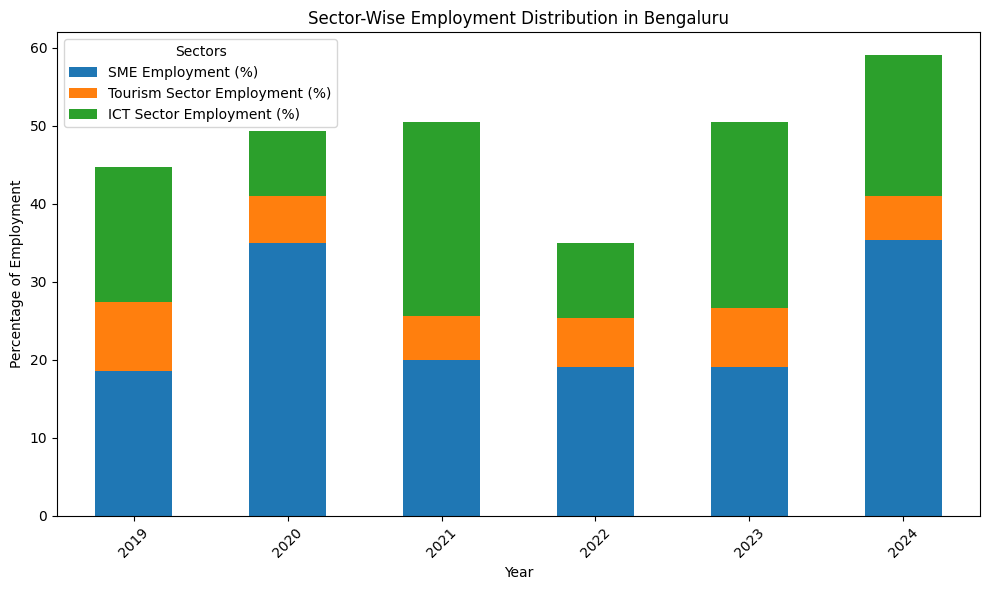

In [ ]:
# Filter data for Bengaluru
bengaluru = data[data['City'] == 'Bengaluru']

# Select columns related to employment sectors
sectors = ['SME Employment (%)', 'Tourism Sector Employment (%)', 'ICT Sector Employment (%)']

# Plot the sector-wise employment over the years
bengaluru.plot(
    x='Year',
    y=sectors,
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    title="Sector-Wise Employment Distribution in Bengaluru"
)

plt.xlabel('Year')
plt.ylabel('Percentage of Employment')
plt.legend(title='Sectors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


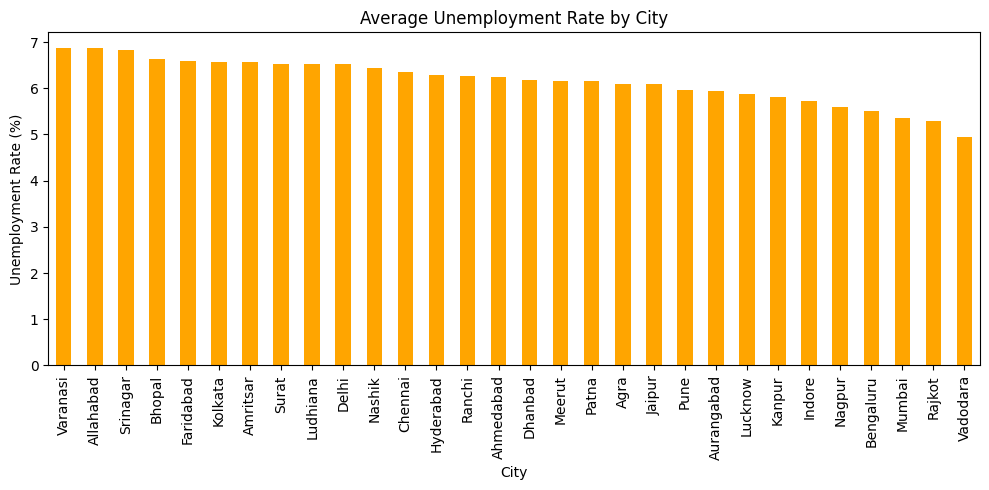

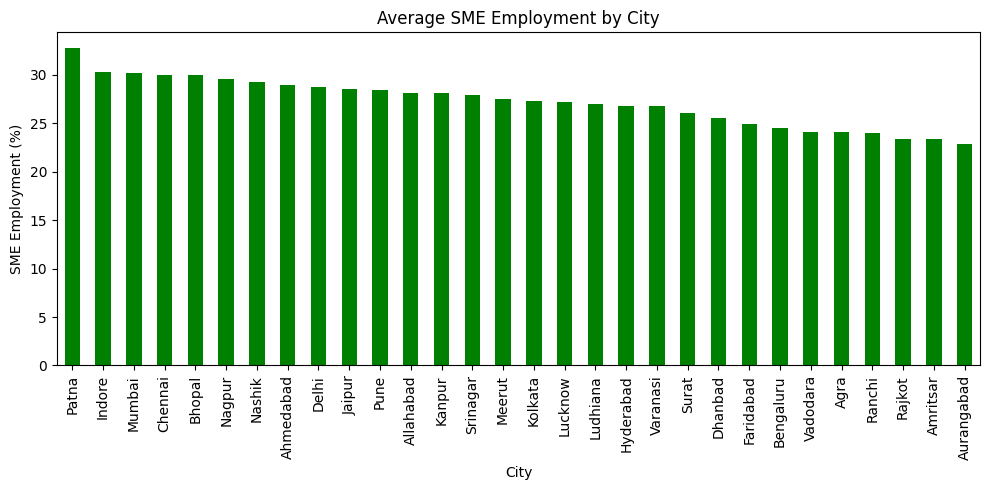

In [ ]:
# Group by city and calculate average unemployment rate and SME employment
city_avg_metrics = data.groupby('City')[['Unemployment Rate (%)', 'SME Employment (%)']].mean()

# Plot a bar chart for average unemployment rate
city_avg_metrics['Unemployment Rate (%)'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 5),
    color='orange',
    title='Average Unemployment Rate by City'
)

plt.xlabel('City')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plot a bar chart for SME employment
city_avg_metrics['SME Employment (%)'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 5),
    color='green',
    title='Average SME Employment by City'
)

plt.xlabel('City')
plt.ylabel('SME Employment (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


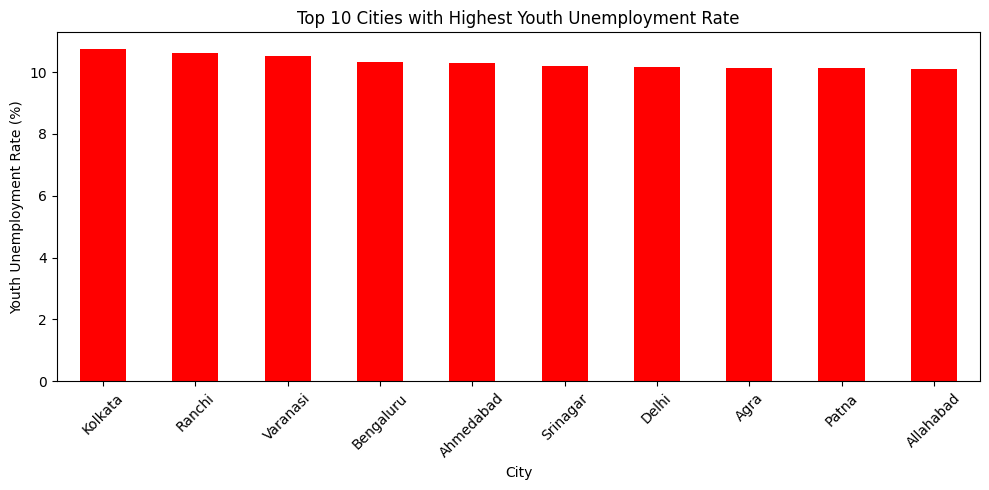

In [ ]:
# Calculate average youth unemployment rate by city
city_youth_unemployment = data.groupby('City')['Youth Unemployment Rate (%)'].mean()

# Sort values and plot the top 10 cities
city_youth_unemployment.sort_values(ascending=False).head(10).plot(
    kind='bar',
    figsize=(10, 5),
    color='red',
    title='Top 10 Cities with Highest Youth Unemployment Rate'
)

plt.xlabel('City')
plt.ylabel('Youth Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


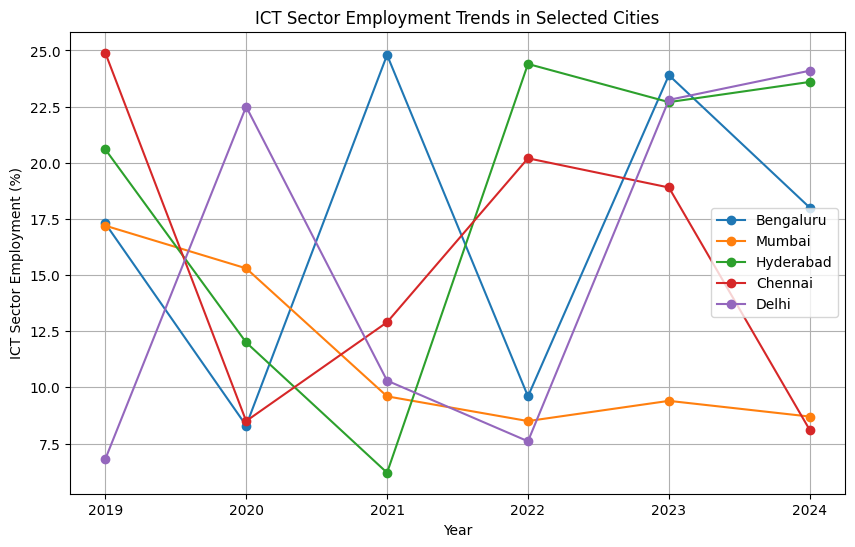

In [ ]:
# Select specific cities for comparison
selected_cities = ['Bengaluru', 'Mumbai', 'Hyderabad', 'Chennai', 'Delhi']

# Filter data for selected cities
city_ict = data[data['City'].isin(selected_cities)]

# Plot ICT sector employment over years for selected cities
plt.figure(figsize=(10, 6))
for city in selected_cities:
    plt.plot(
        city_ict[city_ict['City'] == city]['Year'],
        city_ict[city_ict['City'] == city]['ICT Sector Employment (%)'],
        marker='o',
        label=city
    )

plt.title('ICT Sector Employment Trends in Selected Cities')
plt.xlabel('Year')
plt.ylabel('ICT Sector Employment (%)')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Assuming R&D expenditure and its percentage of GDP are available
# Create an approximate 'GDP (in billion)' column

# We assume that R&D Expenditure (% of GDP) = (R&D Expenditure / GDP) * 100
# Rearranging gives: GDP = (R&D Expenditure * 100) / R&D Expenditure (% of GDP)

data['GDP (in billion)'] = (data['R&D Expenditure (% of GDP)'] / 100)

# Display the result
print(data[['City', 'Year', 'R&D Expenditure (% of GDP)', 'GDP (in billion)']].head())


        City  Year  R&D Expenditure (% of GDP)  GDP (in billion)
0  Ahmedabad  2019                        1.06            0.0106
1  Ahmedabad  2020                        1.93            0.0193
2  Ahmedabad  2021                        1.60            0.0160
3  Ahmedabad  2022                        1.40            0.0140
4  Ahmedabad  2023                        0.73            0.0073


In [ ]:
# Define sector weights
weights = {
    'SME Employment (%)': 0.4,
    'Tourism Sector Employment (%)': 0.1,
    'ICT Sector Employment (%)': 0.3,
    'Agriculture (%)': 0.2
}

# Calculate weighted GDP contributions
data['Estimated GDP'] = (
    data['SME Employment (%)'] * weights['SME Employment (%)'] +
    data['Tourism Sector Employment (%)'] * weights['Tourism Sector Employment (%)'] +
    data['ICT Sector Employment (%)'] * weights['ICT Sector Employment (%)']
)

# Display the results
print(data[['City', 'Year', 'SME Employment (%)', 'Tourism Sector Employment (%)',
            'ICT Sector Employment (%)', 'Estimated GDP']].head())


        City  Year  SME Employment (%)  Tourism Sector Employment (%)  \
0  Ahmedabad  2019                38.5                            5.2   
1  Ahmedabad  2020                19.5                            4.2   
2  Ahmedabad  2021                16.7                            5.1   
3  Ahmedabad  2022                33.5                            7.5   
4  Ahmedabad  2023                29.4                            6.5   

   ICT Sector Employment (%)  Estimated GDP  
0                       20.7          22.13  
1                        6.8          10.26  
2                       13.4          11.21  
3                       22.6          20.93  
4                       23.9          19.58  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Economy_Productivity_SD_India.csv'
data = pd.read_csv(file_path)

# Define sector weights for GDP contribution
weights = {
    'SME Employment (%)': 0.4,
    'Tourism Sector Employment (%)': 0.1,
    'ICT Sector Employment (%)': 0.3,
}

# Calculate weighted GDP contributions
data['Estimated GDP'] = (
    data['SME Employment (%)'] * weights['SME Employment (%)'] +
    data['Tourism Sector Employment (%)'] * weights['Tourism Sector Employment (%)'] +
    data['ICT Sector Employment (%)'] * weights['ICT Sector Employment (%)']
)

# Display data with Estimated GDP
print(data[['City', 'Year', 'SME Employment (%)', 'Tourism Sector Employment (%)',
            'ICT Sector Employment (%)', 'Estimated GDP']].head())


        City  Year  SME Employment (%)  Tourism Sector Employment (%)  \
0  Ahmedabad  2019                38.5                            5.2   
1  Ahmedabad  2020                19.5                            4.2   
2  Ahmedabad  2021                16.7                            5.1   
3  Ahmedabad  2022                33.5                            7.5   
4  Ahmedabad  2023                29.4                            6.5   

   ICT Sector Employment (%)  Estimated GDP  
0                       20.7          22.13  
1                        6.8          10.26  
2                       13.4          11.21  
3                       22.6          20.93  
4                       23.9          19.58  


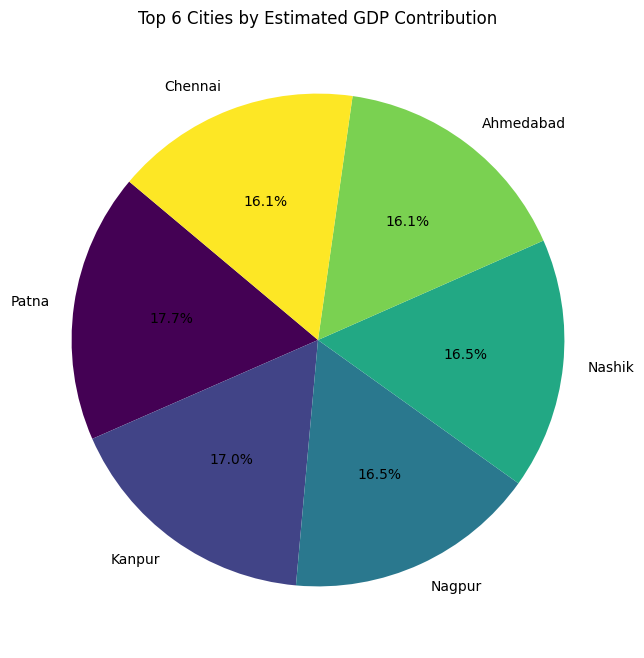

In [ ]:
# Calculate average GDP by city
city_avg_gdp = data.groupby('City')['Estimated GDP'].mean().sort_values(ascending=False).head(6)

# Plot GDP distribution as a pie chart
plt.figure(figsize=(8, 8))
city_avg_gdp.plot.pie(autopct='%1.1f%%', startangle=140, colormap='viridis')
plt.title('Top 6 Cities by Estimated GDP Contribution')
plt.ylabel('')  # Remove y-axis label for clarity
plt.show()


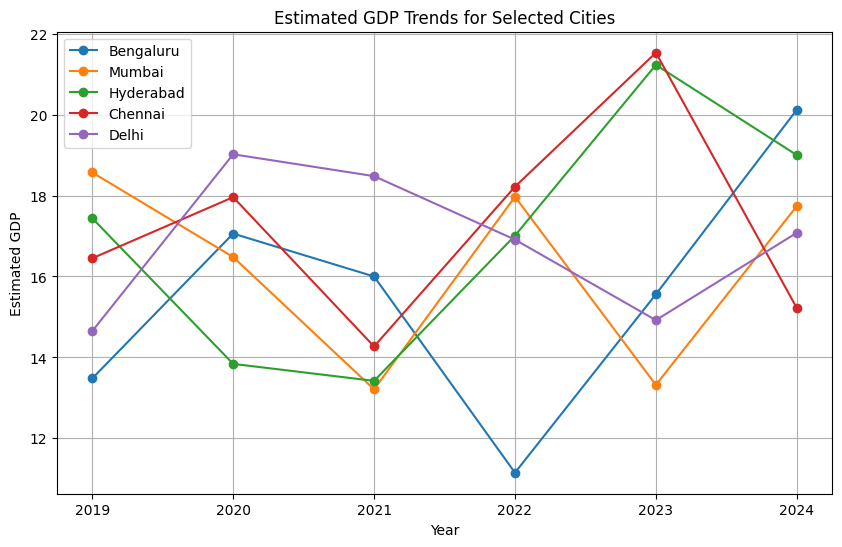

In [ ]:
# Select specific cities to plot their GDP trends
selected_cities = ['Bengaluru', 'Mumbai', 'Hyderabad', 'Chennai', 'Delhi']
city_trend_gdp = data[data['City'].isin(selected_cities)]

# Plot GDP trends
plt.figure(figsize=(10, 6))
for city in selected_cities:
    city_data = city_trend_gdp[city_trend_gdp['City'] == city]
    plt.plot(city_data['Year'], city_data['Estimated GDP'], marker='o', label=city)

plt.title('Estimated GDP Trends for Selected Cities')
plt.xlabel('Year')
plt.ylabel('Estimated GDP')
plt.legend()
plt.grid()
plt.show()


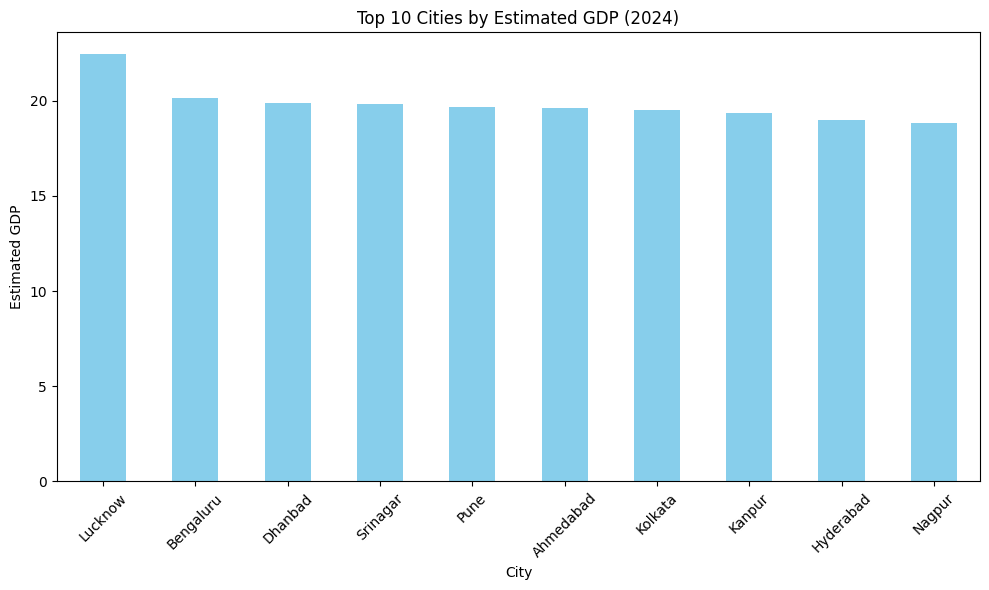

In [ ]:
# Filter data for the year 2024
gdp_2024 = data[data['Year'] == 2024]

# Sort cities by GDP
top_cities_gdp = gdp_2024.groupby('City')['Estimated GDP'].sum().sort_values(ascending=False).head(10)

# Plot GDP as a bar chart
plt.figure(figsize=(10, 6))
top_cities_gdp.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities by Estimated GDP (2024)')
plt.xlabel('City')
plt.ylabel('Estimated GDP')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


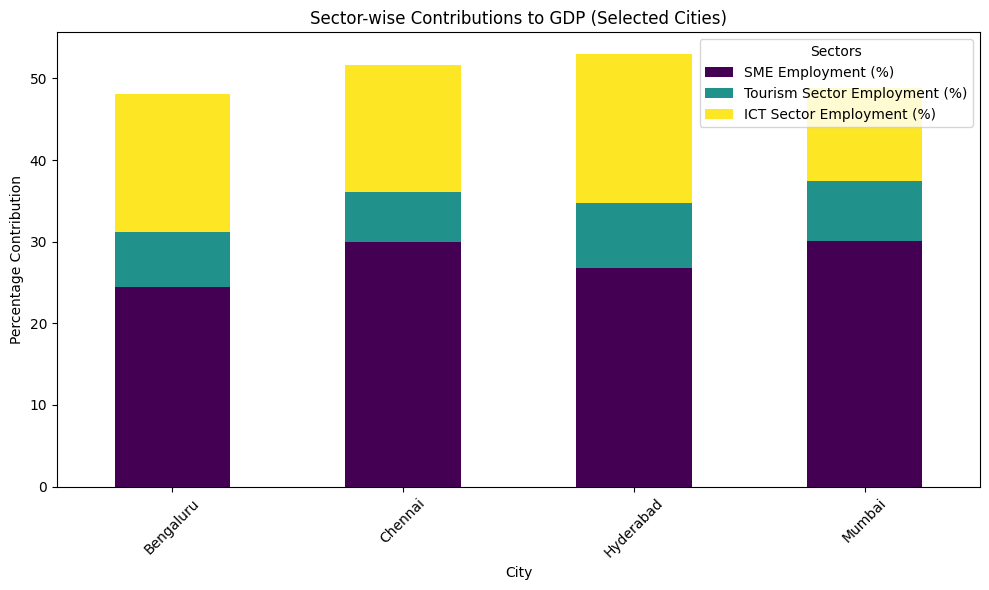

In [ ]:
# Select columns for the stacked bar chart
selected_sectors = ['SME Employment (%)', 'Tourism Sector Employment (%)', 'ICT Sector Employment (%)']

# Filter data for specific cities and years
selected_cities = ['Bengaluru', 'Mumbai', 'Hyderabad', 'Chennai']
city_sector_data = data[data['City'].isin(selected_cities)]

# Group data by city and calculate average sector contributions
city_sector_avg = city_sector_data.groupby('City')[selected_sectors].mean()

# Plot the stacked bar chart
city_sector_avg.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Sector-wise Contributions to GDP (Selected Cities)')
plt.xlabel('City')
plt.ylabel('Percentage Contribution')
plt.legend(title='Sectors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Save the updated dataset with 'Estimated GDP' to a new CSV file
output_file = "city_gdp_estimation.csv"
data.to_csv(output_file, index=False)

print(f"Updated dataset saved as '{output_file}'")


Updated dataset saved as 'city_gdp_estimation.csv'
